# Unit Test Case

## Unit Test Case #1

WCPS query request in a python code with access and encoding the output into image jpeg


C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


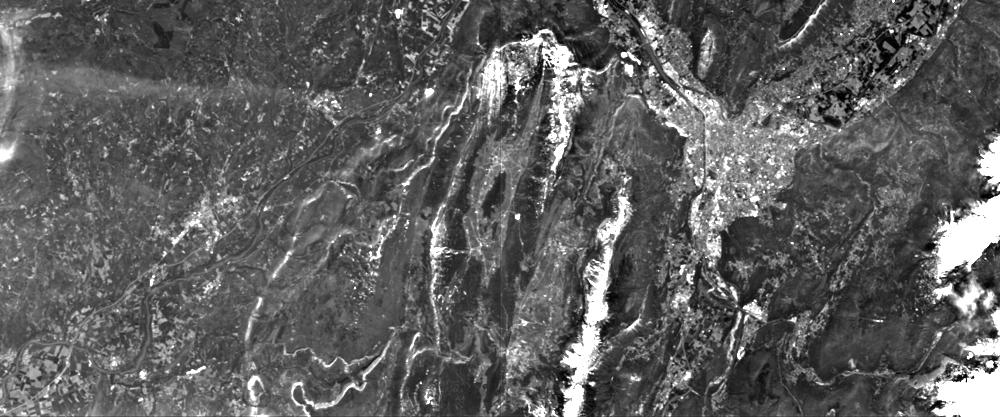

In [1]:
# Sample WCPS query request in a python code with access and encoding operations
# Send a WCPS query for evaluation on the rasdaman server; as WCPS queries usually contain 
# special characters like '[', ']', '{', '}', it is necessary to send POST requests.

from IPython.display import Image
import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

# WCPS query with encoding result in image/jep
query = '''
for $c in (S2_L2A_32631_B01_60m) 
return
  encode(
    ( 0.20 * ( 35.0 + ( 
                (float) $c[ ansi( "2021-04-09" ) ]  ) 
            ) 
    )[ E( 669960:729960 ), N( 4990200:5015220 )  ]
   , "image/jpeg")
'''

response = requests.post(service_endpoint, data = {'query': query}, verify=False)

# Display result directly
# print response.content
Image(data=response.content)

## Unit Test Case #2

WCS request in a python code with subsetting by slicing on time axis and trimming on spatial axes, and encoding the output into image jpeg


C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


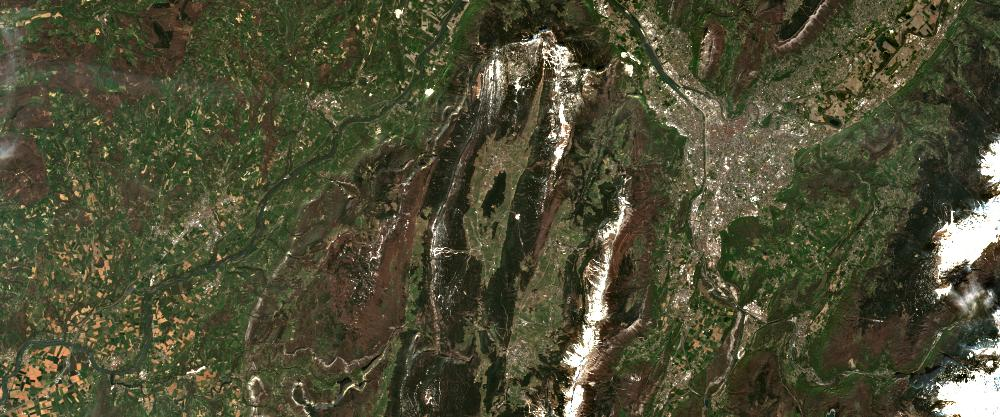

In [20]:
# Get a subset coverage by slicing on time axis, trimming on spatial axes, and encoding result in image/jpeg.

from IPython.display import Image
import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

request = "&REQUEST=GetCoverage"
cov_id = "&COVERAGEID=S2_L2A_32631_TCI_60m"
subset_time = "&SUBSET=ansi(\"2021-04-09\")"
subset_e = "&SUBSET=E(669960,729960)"
subset_n = "&SUBSET=N(4990200,5015220)"
encode_format = "&FORMAT=image/jpeg"

response = requests.get(base_wcs_url + request + cov_id + subset_time + subset_e + subset_n + encode_format, verify=False)

# Display result directly
Image(data=response.content)

## Unit Test Case #3

WCPS query request in a python code with fusion of different coverages


C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


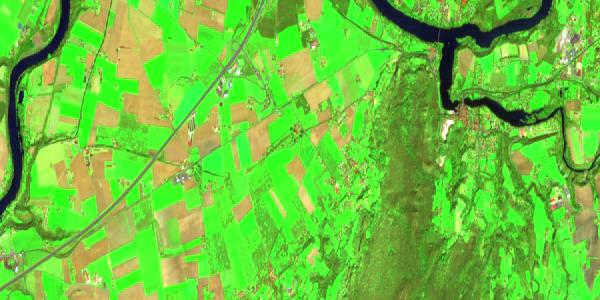

In [1]:
# WCPS query request in a python code with fusion of different coverages

from IPython.display import Image
import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

# WCPS query with fusion operation from different coverages and encoding result in image/jep

query = '''
for $c in (S2_L2A_32631_B12_20m), 
    $d in (S2_L2A_32631_B08_10m),
    $e in (S2_L2A_32631_B03_10m)

   
return
  encode(
    {
      red: scale( $c[ ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 ) ],
                  { E:"CRS:1"(0:599), N:"CRS:1"(0:299) }) ;
    green: scale( $d[ ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 ) ],
                  { E:"CRS:1"(0:599), N:"CRS:1"(0:299) }) ;
     blue: scale( $e[ ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 ) ], 
                  { E:"CRS:1"(0:599), N:"CRS:1"(0:299) })
    } / 15.0
  , "image/jpeg")
'''

response = requests.post(service_endpoint, data = {'query': query}, verify=False)

# Display result directly
Image(data=response.content)



## Unit Test Case #4

WCS request in a python code with aggregation operation to retrieve the minimum temperature of Bremen City in 2014


In [27]:
# WCPS query with aggregation operations to retrieve the minimum temperature of Bremen City in 2014

import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

# WCPS query with aggregation operation - minimum 
query = '''
for $c in (AvgLandTemp) 
return
   min ( $c[Lat(53.08), Long(8.80),ansi("2014-01-01T00:00":"2014-12-31T18:00")] )
'''

response = requests.post(service_endpoint, data = {'query': query}, verify=False)
my_concat_str = "minimum temperature of Bremen City in 2014 : " + str(response.content.decode() + "C")

print(my_concat_str)

C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


minimum temperature of Bremen City in 2014 : 2.2834647C


## Unit Test Case #5

WCS request in a python code with aggregation operation to retrieve the maximum temperature of Bremen City in 2014


In [28]:
# WCPS query with aggregation operations to retrieve the maximum temperature of Bremen City in 2014

import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

# WCPS query with aggregation operation - maximum
query = '''
for $c in (AvgLandTemp) 
return
   max ( $c[Lat(53.08), Long(8.80),ansi("2014-01-01T00:00":"2014-12-31T18:00")] )
'''

response = requests.post(service_endpoint, data = {'query': query}, verify=False)
my_concat_str = "maximum temperature of Bremen City in 2014 : " + str(response.content.decode() + "C")

print(my_concat_str)

C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


maximum temperature of Bremen City in 2014 : 25.984251C


## Unit Test Case #6

WCS request in a python code with aggregation operation to retrieve the average temperature of Bremen City in 2014


In [29]:
# WCPS query with aggregation operation to retrieve the average temperature of Bremen City in 2014

import requests

# Set base url which can be used in further code examples
service_endpoint = "https://ows.rasdaman.org/rasdaman/ows"
base_wcs_url = service_endpoint + "?service=WCS&version=2.0.1"

# WCPS query with aggregation operation - average

query = '''
for $c in (AvgLandTemp) 
return
   avg ( $c[Lat(53.08), Long(8.80),ansi("2014-01-01T00:00":"2014-12-31T18:00")] )
'''

response = requests.post(service_endpoint, data = {'query': query}, verify=False)
my_concat_str = "average temperature of Bremen City in 2014 : " + str(response.content.decode() + "C")

print(my_concat_str)

C:\Users\erb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


average temperature of Bremen City in 2014 : 15.052493472894033C


# Unit Test Case #7

Test case for start_menu.py the selection menu with a loop of the WCPS operations and features.


## Testing steps:

Input Option 1

Input Option 2

Input Option 3

Input Option 4

Input Option 5

Input Option 6

Input Option 7  (Executing program option 7 - not started yet...)

Input Option 9  (Invalid choice. Please try again)

Input Option 8  (Existing the program)


In [6]:
# Start main program to provide a selection menu as an interface with the WCPS Server

import subprocess

def program_7():
    print("Executing program option 7 - not started yet...")
    # Add your code for program B here

def display_menu():
    print("Selction Menu as an interface with the WCPS Server:")
    print("1. WCPS query to access and encode the datacube into a jpeg image")
    print("2. WCS request to subset the datacube")
    print("3. WCPS query with fusion of different coverages")
    print("4. WCPS query to retrieve minimum temperature of Bremen City in 2014")
    print("5. WCPS query to retrieve maximum temperature of Bremen City in 2014")
    print("6. WCPS query to retrieve average temperature of Bremen City in 2014")
    print("7. WCPS query to retrieve monthly average temperature of Bremen City in 2014 -NOT started")
    print("8. Quit")

def main():
    while True:
        display_menu()
        choice = input("Enter your choice (1-8): ")

        if choice == "1":
            try:
                completed_process = subprocess.run(["python", "opt1_wcps_access.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt1_wcps_access.py not found.")
        elif choice == "2":
            try:
                completed_process = subprocess.run(["python", "opt2_wcs_subsetting.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt2_wcs_subsetting.py not found.")
        elif choice == "3":
            try:
                completed_process = subprocess.run(["python", "opt3_wcps_fusion.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt3_wcps_fusion.py not found.")
        elif choice == "4":
            try:
                completed_process = subprocess.run(["python", "opt4_wcps_minimum.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt4_wcps_minimum.py not found.")
        elif choice == "5":
            try:
                completed_process = subprocess.run(["python", "opt5_wcps_maximum.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt5_wcps_maximum.py not found.")
        elif choice == "6":
            try:
                completed_process = subprocess.run(["python", "opt6_wcps_average.py"],capture_output=True,text=True)
                if completed_process.returncode == 0:
                    print("==============================")
                    print("execution successful")
                    print(completed_process.stdout)
                else:
                    print("==============================")
                    print("error in execution")
                    print(completed_process.stderr)
            except FileNotFoundError:
                print("Error: opt6_wcps_average.py not found.")
        elif choice == "7":
            program_7()
        elif choice == "8":
            print("==============================")
            print("Exiting the program...")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()

Selction Menu as an interface with the WCPS Server:
1. WCPS query to access and encode the datacube into a jpeg image
2. WCS request to subset the datacube
3. WCPS query with fusion of different coverages
4. WCPS query to retrieve minimum temperature of Bremen City in 2014
5. WCPS query to retrieve maximum temperature of Bremen City in 2014
6. WCPS query to retrieve average temperature of Bremen City in 2014
7. WCPS query to retrieve monthly average temperature of Bremen City in 2014 -NOT started
8. Quit
Enter your choice (1-8): 1
execution successful
option 1
 

Selction Menu as an interface with the WCPS Server:
1. WCPS query to access and encode the datacube into a jpeg image
2. WCS request to subset the datacube
3. WCPS query with fusion of different coverages
4. WCPS query to retrieve minimum temperature of Bremen City in 2014
5. WCPS query to retrieve maximum temperature of Bremen City in 2014
6. WCPS query to retrieve average temperature of Bremen City in 2014
7. WCPS query to r